# Strategic Measure Number of Returns to Homelessness Exploratory Notebook

## Import the data

### Things we can present to the team:

* We created a function for you to use, but can you improve it with the data we have?
    * What would the dataset look like and how would correlation improve/decrease if we just import the data as-is using pandas?
    * Can we do more to clean this?
    * Can we feature engineer columns needed?
* What questions can we glean from this data?



In [21]:
import pandas as pd
from app import wrangle_with_dt, wrangle_without_dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Run data through wrangle function to return clean df
df_return_to_homelessness = wrangle_without_dt('Strategic_Measure_Number_of_returns_to_homelessness.csv')

In [4]:
# View first 20 rows to ensure data was ported properly via wrangle
# Also allows us to start visualizing data
df_return_to_homelessness.head(20)

,Demographic Category,Specific Demographic,Fiscal Year,SO/ES/TH/SH/PH,Numerator,Denominator,Rate,Fiscal Year Start Date,Fiscal Year End Date
0,Race,American Indian or Alaskan Native,2017,SO,0,0,0.0,10/01/2016 12:00:00 AM,09/30/2017 12:00:00 AM
1,Race,Asian,2017,SO,0,0,0.0,10/01/2016 12:00:00 AM,09/30/2017 12:00:00 AM
2,Race,Black or African American,2017,SO,0,0,0.0,10/01/2016 12:00:00 AM,09/30/2017 12:00:00 AM
3,Race,Native Hawaiian or Other Pacific Islander,2017,SO,0,0,0.0,10/01/2016 12:00:00 AM,09/30/2017 12:00:00 AM
4,Race,White,2017,SO,0,0,0.0,10/01/2016 12:00:00 AM,09/30/2017 12:00:00 AM
5,Race,Client Doesn't Know or Client Refused,2017,SO,0,0,0.0,10/01/2016 12:00:00 AM,09/30/2017 12:00:00 AM
6,Ethnicity,Hispanic/Latino,2017,SO,0,0,0.0,10/01/2016 12:00:00 AM,09/30/2017 12:00:00 AM
7,Ethnicity,Non-Hispanic/Non-Latino,2017,SO,0,0,0.0,10/01/2016 12:00:00 AM,09/30/2017 12:00:00 AM
8,Ethnicity,Client Doesn't Know or Client Refused,2017,SO,0,0,0.0,10/01/2016 12:00:00 AM,09/30/2017 12:00:00 AM
9,Gender,Female,2017,SO,0,0,0.0,10/01/2016 12:00:00 AM,09/30/2017 12:00:00 AM


## Data Preprocessing

### Do all the data types match what the column should be?
For example, is our Fiscal Year an integer? Is the rate saved as a float? What do we have to work with?

In [5]:
# Look into .info() to see how the columns are stored.
# Verbose allows you to look at all the columns instead of the set max columns panda returns by default.
df_return_to_homelessness.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Demographic Category    490 non-null    object 
 1   Specific Demographic    490 non-null    object 
 2   Fiscal Year             490 non-null    int64  
 3   SO/ES/TH/SH/PH          490 non-null    object 
 4   Numerator               490 non-null    int64  
 5   Denominator             490 non-null    int64  
 6   Rate                    490 non-null    float64
 7   Fiscal Year Start Date  490 non-null    object 
 8    Fiscal Year End Date   490 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 34.6+ KB


### How is the data distributed?
.Describe() will give us our metrics. We can get a good idea of how the data falls from min to max. We can also see if there are large jumps in our data(ie if we had numerator start at 0, but it's max was 1,000,000)

In [6]:
df_return_to_homelessness.describe()

,Fiscal Year,Numerator,Denominator,Rate
count,490.000000,490.000000,490.000000,490.000000
mean,2018.408163,13.646939,75.661224,0.126184
std,1.087546,26.127418,141.377548,0.173231
min,2017.000000,0.000000,0.000000,0.000000
25%,2017.000000,0.000000,0.000000,0.000000
50%,2018.000000,1.000000,5.000000,0.055000
75%,2019.000000,10.000000,62.750000,0.190000
max,2020.000000,145.000000,801.000000,1.390000


all but Fiscal Year start at a 0. Data does not range higher than 1,000 in max value. I do not think we need to change this part of the data.

## EDA
* Graph Plots
* Plotly Visualizations
* Target identification and Feature Engineering

<AxesSubplot:>

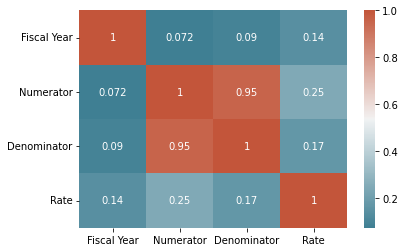

In [7]:
# Create a correlation matrix
corr = df_return_to_homelessness.corr()

# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Heat map shows correlation between columns. We can see that the fiscal year does not hold much value in terms of the data. We may try removing this and seeing how it affects the correlation.
Another point to take into consideration is that it should be ***numerator/denominator = rate***. If this is the formula used, keeping the numerator and denominator will cause a great amount of data leakage. 

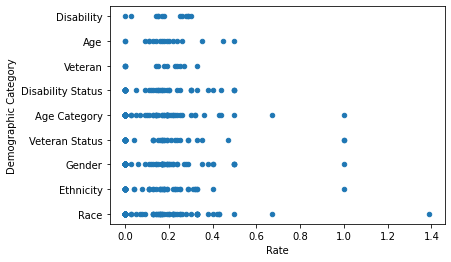

In [8]:
df_return_to_homelessness.plot(kind='scatter', x='Rate', y='Demographic Category');

We can see that the dataset has a couple of outliers. One specific datapoint in race is unusually high. We may consider removing this and filtering the data.

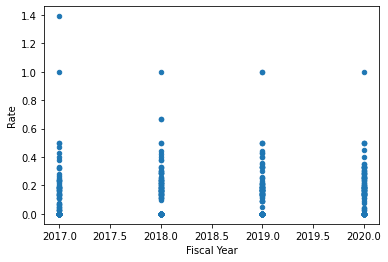

In [9]:
df_return_to_homelessness.plot(kind='scatter', x='Fiscal Year', y='Rate');

Data is clustered heavily around 0.6 in Rate. If we filter the data to only return up to there, then we can effectively eliminate the outliers.

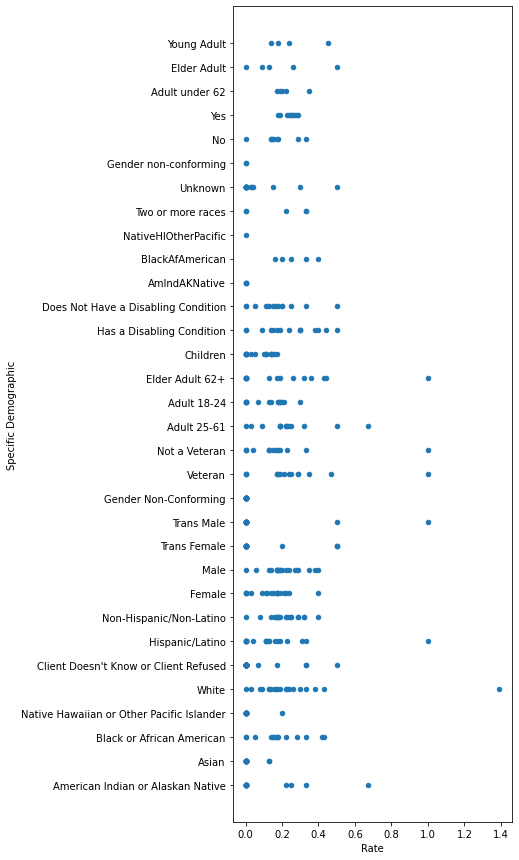

In [14]:
df_return_to_homelessness.plot(kind='scatter', x='Rate', y='Specific Demographic', figsize=(5,15));

Reaffirms suspisions that we should cut rate from 0.6. This will benefit the dataset.

### Some Fun Stuff

C:\Users\Alex Lucchesi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alex Lucchesi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alex Lucchesi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

<AxesSubplot:xlabel='Rate', ylabel='Density'>

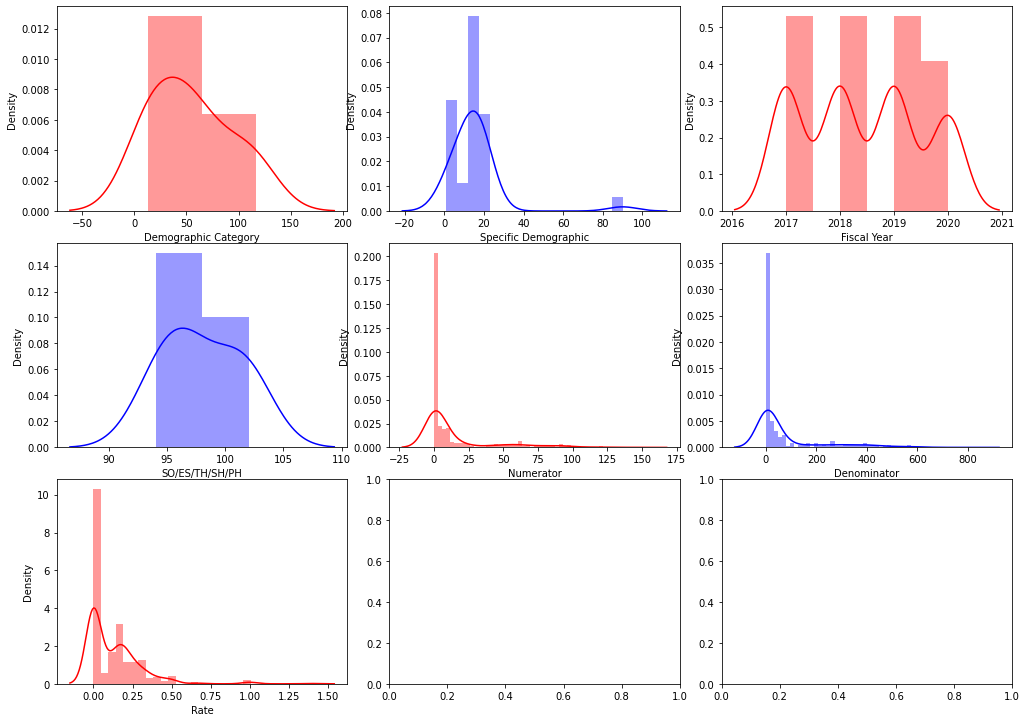

In [20]:
df = df_return_to_homelessness
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))
plt.tight_layout();
sns.distplot(df['Demographic Category'].value_counts(), color='r', ax=axes[0][0]);
sns.distplot(df['Specific Demographic'].value_counts(), color='b', ax=axes[0][1]);
sns.distplot(df['Fiscal Year'], color='r', ax=axes[0][2]);
sns.distplot(df['SO/ES/TH/SH/PH'].value_counts(), color='b', ax=axes[1][0]);
sns.distplot(df['Numerator'], color='r', ax=axes[1][1]);
sns.distplot(df['Denominator'], color='b', ax=axes[1][2]);
sns.distplot(df['Rate'], color='r', ax=axes[2][0]);


In [22]:
fig=px.violin(df, y='Rate', color='Fiscal Year', points='all', hover_name='Demographic Category', hover_data=['Specific Demographic'])
fig.show()

In [25]:
fig = px.scatter(df,x='Demographic Category', y='Rate',color='Fiscal Year',hover_name='Specific Demographic',hover_data=['Numerator','Denominator'])
fig.show()

In [30]:
fig= px.scatter(df, x='Numerator', y='Denominator', animation_frame='Fiscal Year', animation_group='Demographic Category', hover_name='Demographic Category',hover_data=['Specific Demographic','Rate'])
fig.show()

## Conclusion:

We can remove the numerator and denominator from this file. Doing so will not harm the data and we may see correlation between other categories go up. We can create a model out of this data to predict the rate of return to homelessness given these specific pieces of data. 